This is a notebook used to perfrom some exploratory data analysis on the processed dataset.

# Load dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load data

In [47]:
data = pd.read_csv("../data/coffee_review_processed_01.csv") # pd.read_csv("../data/coffee_test.csv")
df0 = pd.read_csv("../data/coffee_ultimato.csv")

In [55]:
# Check the difference in each row of the URL column
sum(data["URL"] == df0["URL"])

8387

In [41]:
# Compare columns in coffee_review_processed_01 and coffee_ultimato
set1 = set(data.columns)
set2 = set(df0.columns)
print("Deleted columns:", set1 - set2)
print("Added columns:", set2 - set1)

Deleted columns: {'Review Date', 'all_text', 'Est. Price', 'Roast Level', 'Agtron'}
Added columns: {'coffee_name_hundredpercent', 'review_date_adj', 'coffee_origin_adj', 'roast_lv_adj'}


In [56]:
roast_levels = ["light", "medium-light", "medium", "medium-dark", "dark", "very dark"]
level_label_map = dict(zip(roast_levels, list(range(1, 7))))
label_level_map = dict(zip(list(range(1, 7)), roast_levels))

In [43]:
df0.columns

Index(['URL', 'Rating', 'Roaster', 'Coffee Name', 'Roaster Location',
       'Coffee Origin', 'Aroma', 'Acidity', 'Acidity/Structure', 'Body',
       'Flavor', 'Aftertaste', 'With Milk', 'Blind Assessment', 'Notes',
       'Who Should Drink It', 'Bottom Line', 'Agtron_whole', 'Agtron_ground',
       'Roaster Latitude', 'Roaster Longitude', 'usd_per_100g_adj',
       'coffee_origin_adj', 'roast_lv_adj', 'coffee_name_hundredpercent',
       'review_date_adj'],
      dtype='object')

# Data Preprocessing for clustering

## Check Agtron
Valid range: 0-100

In [37]:
df0[df0["Agtron_whole"] > 100] #.loc[2050, "URL"] # 2050: 54, 5780:52, 7748:55 , 8115: 57

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj
2050,https://www.coffeereview.com/review/ecuador-la...,93.0,Paradise Roasters,Ecuador La Hormiga “Naty”,"Minneapolis, Minnesota","Chito, Zamora Chinchipe, Ecuador",9.0,NaN,8.0,9.0,...,"An unassuming, quietly complex natural-process...",547.0,74.0,44.977753,-93.265011,7.826531,ecuador,1.0,False,2021-02-01
5780,https://www.coffeereview.com/review/look-for-t...,91.0,Tony's Coffee,Look for the Helpers,"Bellingham, Washington",Ethiopia; Central America,8.0,NaN,8.0,9.0,...,100% of the profits from the sale of this coff...,5252.0,70.0,48.782519,-122.449792,4.433329,ethiopia,1.0,False,2021-03-01
7748,https://www.coffeereview.com/review/sumatra-mu...,93.0,Jackrabbit Java,Sumatra Mutu Batak,"Thermopolis, Wyoming","Lintong growing region, North Sumatra Province...",9.0,NaN,8.0,9.0,...,"A classic Sumatra cup: earthy-rich, deeply cho...",555.0,73.0,43.646379,-108.211045,4.999420,indonesia,1.0,False,2020-12-01
8115,https://www.coffeereview.com/review/uganda-sir...,92.0,Coffee By Design,Uganda Sironko Station Natural,"Portland, Maine","Bugisu Region, Uganda",9.0,NaN,8.0,8.0,...,An interestingly composed Uganda natural with ...,578.0,80.0,43.666110,-70.256554,4.629711,uganda,1.0,False,2024-12-01


In [ ]:
# agtron_whole_indices = [2050, 5780, 7748, 8115]
# df0.loc[2050, 'Agtron_whole'] = 54
# df0.loc[5780, 'Agtron_whole'] = 52
# df0.loc[7748, 'Agtron_whole'] = 55
# df0.loc[8115, 'Agtron_whole'] = 57

# df0[df0["Agtron_whole"] > 100] 

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj


In [ ]:
df0[df0["Agtron_ground"] > 100]
# df0[df0["Agtron_whole"] == 48]
# df0.loc[7309, 'Agtron_ground'] = 68

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj


In [ ]:
# df0.to_csv("../data/coffee_ultimato.csv", index=False)

In [ ]:
# 04/13 task - Can we handle missing value in Agtron_whole/Agtron_ground if we have roast level info?
df0[(df0["Agtron_whole"].isnull()) & (~df0["roast_lv_adj"].isnull())]

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj
17,https://www.coffeereview.com/review/100-colomb...,71.0,Yuban Coffee Company,100% Colombian,"White Plains, New York",NaN,4.0,5.0,NaN,8.0,...,NaN,NaN,64.0,41.033221,-73.765041,NaN,others,2.0,True,1997-05-01
230,https://www.coffeereview.com/review/augies-eth...,89.0,Voila Coffee,Augie’s Ethiopia Layo Teraga Natural (Instant ...,"Bend, Oregon","Guji Zone, Oromia Region, southern Ethiopia",8.0,NaN,8.0,8.0,...,"The juicy, lushly sweet-tart character of a fi...",NaN,NaN,44.078977,-121.305289,NaN,ethiopia,1.0,False,2018-09-01
231,https://www.coffeereview.com/review/augies-eth...,88.0,Voila Coffee,Augie’s Ethiopia Layo Teraga Washed (Instant C...,"Bend, Oregon","Guji Zone, Oromia Region, southern Ethiopia",8.0,NaN,8.0,7.0,...,"Rewards patience, which should reveal, beneath...",NaN,NaN,44.078977,-121.305289,NaN,ethiopia,1.0,False,2018-09-01
529,https://www.coffeereview.com/review/brazil-cup...,92.0,Difference Coffee,Brazil Cup of Excellence Prize Winner,"London, England","Chapada Diamantina growing region, Bahia State...",8.0,NaN,NaN,8.0,...,"A sweet, delicately distinctive Brazil, cocoa-...",NaN,58.0,51.507706,-0.067183,NaN,brazil,3.0,False,2018-08-01
1241,https://www.coffeereview.com/review/colombia-l...,90.0,Timothy's World Coffee,Colombia La Vereda,"Toronto, Canada",NaN,8.0,8.0,NaN,8.0,...,NaN,NaN,NaN,43.653226,-79.383184,NaN,others,1.0,False,2003-02-01
1464,https://www.coffeereview.com/review/colombian-...,87.0,Millstone Coffees,Colombian Supremo,"Cincinnati, Ohio",Colombia.,7.0,7.0,NaN,7.0,...,NaN,NaN,NaN,39.103118,-84.512020,NaN,colombia,1.0,False,2003-01-01
2692,https://www.coffeereview.com/review/ethiopia-d...,86.0,Reanimator Coffee Roasters,Ethiopia Duromina (Instant Coffee),"Philadelphia, Pennsylvania","Oromia Region, southern Ethiopia",7.0,NaN,7.0,7.0,...,Quietly lively washed Ethiopia that preserves ...,NaN,NaN,39.952421,-75.216661,NaN,ethiopia,1.0,False,2018-09-01
3646,https://www.coffeereview.com/review/fair-trade...,84.0,Bucks County Coffee,Fair Trade Organic Sumatra,"Langhorne, Pennsylvania","Northwestern Sumatra, Indonesia",7.0,6.0,NaN,8.0,...,NaN,NaN,54.0,40.191887,-74.868606,NaN,indonesia,3.0,False,2003-06-01
3784,https://www.coffeereview.com/review/folger-mou...,77.0,Procter & Gamble,Folger Mountain Grown Coffee,"Cincinnati, Ohio",NaN,6.0,5.0,NaN,7.0,...,NaN,NaN,60.0,39.103118,-84.512020,NaN,others,3.0,False,1997-05-01
3788,https://www.coffeereview.com/review/folgers-fr...,74.0,Procter & Gamble,Folgers French Roast,"Cincinnati, Ohio",NaN,7.0,5.0,NaN,7.0,...,NaN,NaN,55.0,39.103118,-84.512020,NaN,others,3.0,False,1997-05-01


## Check other numerical values
Aroma-Valid range: 1-10

Acidity; Acidity/Structure-Valid range: 1-10

Body-Valid range: 1-10

Flavor-Valid range: 1-10

Aftertaste-Valid range: 1-10

In [65]:
df0["Aftertaste"].value_counts()

Aftertaste
8.0     4791
9.0     1377
7.0     1079
6.0       88
5.0       30
10.0      26
4.0       13
3.0        6
2.0        3
Name: count, dtype: int64

# Training data

In [66]:
coffee_characteristics = ["Coffee Origin", "coffee_origin_adj", 
                          "roast_lv_adj", 
                          "Agtron_whole", "Agtron_ground",
                          "Aroma",
                          "Acidity",
                          "Acidity/Structure",
                          "Body",
                          "Flavor",
                          "Aftertaste",
                          "With Milk",
                          "Roaster Latitude", "Roaster Longitude",
                          "review_date_adj"]

targets = ["Rating", "usd_per_100g_adj"]
df = df0[["URL"] + coffee_characteristics + targets].copy()

In [58]:
# # Count missing values in each column
# missing_values = df.isnull().sum()

# # Calculate missing rate (missing values / total rows)
# missing_rate = round(missing_values * 100 / len(df), 2)

# print("Missing values per column:")
# print(missing_values)
# print("\nMissing rate per column:")
# print(missing_rate)

In [67]:
# Check Acidity and Acidity/Structure - Are they consistent?
print(len(df[(~df["Acidity"].isnull()) & (~df["Acidity/Structure"].isnull())]))

# Combine the 2 columns - Fill "Acidity" using "Acidity/Structure"
df['Acidity_combined'] = df.apply(
    lambda row: row['Acidity/Structure'] if pd.isna(row['Acidity']) else row['Acidity'],
    axis=1)

# Check NaN in the new Acidity column
sum(df["Acidity_combined"].isnull())

0


1409

In [68]:
features = ["roast_lv_adj", 
            "Agtron_whole", "Agtron_ground",
            "Aroma",
            "Acidity_combined",
            "Body",
            "Flavor",
            "Aftertaste"] # "Roaster Latitude", "Roaster Longitude", "review_date_adj", "With Milk", "Coffee Origin", "coffee_origin_adj"
train_df = df[["URL"] + features].copy()

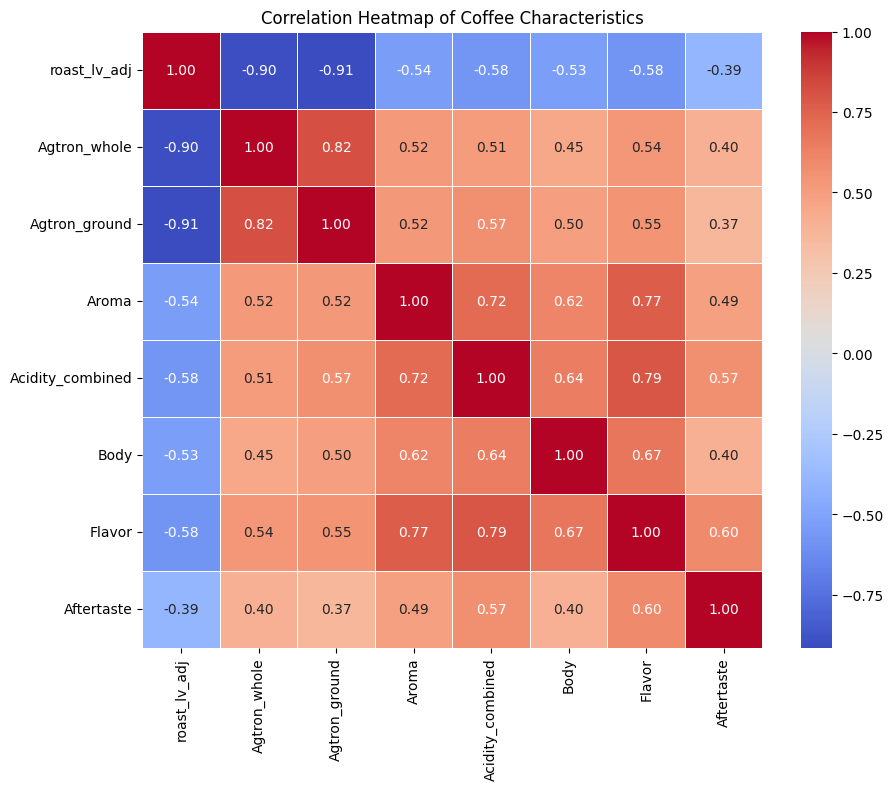

In [69]:
corr_matrix = train_df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Coffee Characteristics')
plt.show()

In [57]:
train_df.isnull().sum()

URL                    0
roast_lv_adj         506
Agtron_whole         415
Agtron_ground        406
Aroma                167
Acidity_combined    1409
Body                 116
Flavor               120
Aftertaste           974
dtype: int64

In [75]:
train_df

,URL,roast_lv_adj,Agtron_whole,Agtron_ground,Aroma,Acidity_combined,Body,Flavor,Aftertaste
0,https://www.coffeereview.com/review/100-arabic...,3.0,48.0,65.0,8.0,NaN,8.0,8.0,7.0
1,https://www.coffeereview.com/review/100-arabic...,5.0,0.0,80.0,7.0,NaN,8.0,7.0,7.0
2,https://www.coffeereview.com/review/100-arabic...,2.0,54.0,69.0,8.0,7.0,7.0,8.0,7.0
3,https://www.coffeereview.com/review/100-arabic...,NaN,0.0,0.0,7.0,7.0,8.0,8.0,8.0
4,https://www.coffeereview.com/review/100-arabic...,NaN,0.0,0.0,4.0,4.0,7.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...
8382,https://www.coffeereview.com/review/zimbabwean...,3.0,48.0,67.0,8.0,7.0,8.0,8.0,7.0
8383,https://www.coffeereview.com/review/zimbabwe/,3.0,50.0,63.0,5.0,6.0,8.0,6.0,7.0
8384,https://www.coffeereview.com/review/zombie-des...,4.0,47.0,52.0,8.0,7.0,8.0,7.0,7.0
8385,https://www.coffeereview.com/review/zoom-espre...,3.0,44.0,60.0,9.0,NaN,8.0,9.0,8.0


In [77]:
train_df_1 = train_df[~train_df["roast_lv_adj"].isnull()]

In [81]:
train_df_1.isnull().sum()

URL                    0
roast_lv_adj           0
Agtron_whole          30
Agtron_ground         21
Aroma                 21
Acidity_combined    1245
Body                  11
Flavor                13
Aftertaste           618
dtype: int64

In [80]:
train_df_1.to_csv("../data/clustering_train.csv", index=False)

In [34]:
# plt.figure(figsize=(10, 6))
# train_df["Body"].plot(kind="hist") # sns.histplot(train_df['Body'], kde=False, bins=10, color='blue')  # Use KDE=False to avoid a density curve
# plt.title('Distribution of Coffee Body')
# plt.xlabel('Body')
# plt.ylabel('Frequency')
# plt.show()